# Design the problem (generate own data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def filled_circle(radius1, radius2, num_points=600):

    retx = []
    rety = []
    inside = 0

    while inside < num_points:

        x = -radius1 + (radius1 + radius1)*np.random.random()
        y = -radius1 + (radius1 + radius1)*np.random.random()
        z = np.sqrt(x**2 + y**2)

        if  z <= radius1 and z > radius2:
            retx.append(x)
            rety.append(y)
            inside += 1
            
    return np.array(retx), np.array(rety)

In [3]:
radius1 = 2.0
radius2 = 1.5
radius3 = 1.0
radius4 = 0.5

x1, y1 = filled_circle(radius1, radius2)
x2, y2 = filled_circle(radius2, radius3)
x3, y3 = filled_circle(radius3, radius4)
x4, y4 = filled_circle(radius4, 0)

x1 = x1.reshape(-1,1); y1 = y1.reshape(-1,1)
x2 = x2.reshape(-1,1); y2 = y2.reshape(-1,1)
x3 = x3.reshape(-1,1); y3 = y3.reshape(-1,1)
x4 = x4.reshape(-1,1); y4 = y4.reshape(-1,1)

print(x1.shape, x2.shape, x3.shape, x4.shape)
print(y1.shape, y2.shape, y3.shape, y4.shape)

(600, 1) (600, 1) (600, 1) (600, 1)
(600, 1) (600, 1) (600, 1) (600, 1)


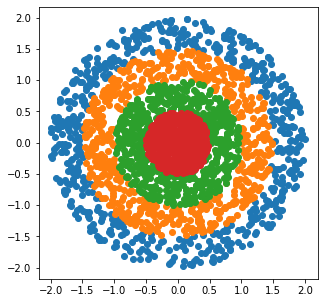

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.scatter(x4,y4)

# Fix the data so it can be processed

In [5]:
data = np.hstack( (np.vstack( (x1, x2, x3, x4) ), np.vstack( (y1, y2, y3, y4) ) ) )
data.shape

(2400, 2)

In [6]:
def create_labels(max_categories=2, data_length=100):
    l = list()
    for i in range(0, max_categories):
        l += [i]*(data_length//max_categories)

    labels = np.array(l)
    return labels

labels = create_labels(max_categories=4, data_length = data.shape[0])
print(labels)
labels.shape

[0 0 0 ... 3 3 3]


(2400,)

# Split & Scale the data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.5, random_state = 23)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Create a neural network

In [11]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


## Testing Different types of networks

In [12]:
# input_layer = Input(shape=(2,))

# layer1 = Dense(10, activation='relu')(input_layer)
# layer2 = Dense(20, activation='relu')(layer1)
# layer3 = Dense(10, activation='relu')(layer2)

# output_layer = Dense(4, activation='softmax')(layer3)

In [13]:
input_layer = Input(shape=(2,))

layer1 = Dense(512, activation='relu')(input_layer)
layer2 = Dense(128, activation='relu')(layer1)
layer3 = Dense(64, activation='relu')(layer2)
layer4 = Dense(32, activation='relu')(layer3)
layer5 = Dense(16, activation='relu')(layer4)
layer6 = Dense(8, activation='relu')(layer5)

output_layer = Dense(4, activation='softmax')(layer6)

In [14]:
# input_layer = Input(shape=(2,))

# layer1 = Dense(512, activation='relu')(input_layer)
# layer2 = Dense(64, activation='relu')(layer1)
# dropout1 = Dropout(0.5)(layer2)                     # helps generalized
# layer3 = Dense(30, activation='relu')(dropout1)
# layer4 = Dense(20, activation='relu')(layer3)
# layer5 = Dense(10, activation='relu')(layer4)
# dropout2 = Dropout(0.5)(layer5)
# layer6 = Dense(40, activation='relu')(dropout2)

# output_layer = Dense(4, activation='softmax')(layer6)

In [15]:
model = Model(inputs=input_layer, outputs=output_layer)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Run the neural network

In [17]:
#model.fit(train_data, train_labels, batch_size=8, epochs=5, verbose=1)

In [18]:
model.fit(train_data, train_labels, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
1200/1200 [==============================] - 1s 440us/step - loss: 1.3732 - accuracy: 0.3433
Epoch 2/100
1200/1200 [==============================] - 0s 91us/step - loss: 1.2663 - accuracy: 0.3917
Epoch 3/100
1200/1200 [==============================] - 0s 85us/step - loss: 1.1071 - accuracy: 0.4475
Epoch 4/100
1200/1200 [==============================] - 0s 82us/step - loss: 0.9892 - accuracy: 0.5817
Epoch 5/100
1200/1200 [==============================] - 0s 88us/step - loss: 0.9204 - accuracy: 0.6233
Epoch 6/100
1200/1200 [==============================] - 0s 101us/step - loss: 0.8140 - accuracy: 0.6675
Epoch 7/100
1200/1200 [==============================] - 0s 83us/step - loss: 0.6840 - accuracy: 0.6983
Epoch 8/100
1200/1200 [==============================] - 0s 84us/step - loss: 0.4235 - accuracy: 0.8442
Epoch 9/100
1200/1200 [==============================] - 0s 81us/step - loss: 0.2858 - accuracy: 0.9175
Epoch 10/100
1200/1200 [==============================] - 0s 9

In [19]:
train_labels

array([2, 1, 3, ..., 1, 1, 0])

# See how well it preformed

In [20]:
results = model.predict(test_data)
predict_labels = np.argmax(results,axis=1)

In [21]:
# The following 3 cells were for binary classification

# since the neural network returns the answer in sigmoid, must converto to 0s and 1s
# def convert(x): 

#     retval = []
#     for i in range(0, len(x)):
#         if x[i] <= 0.5:
#             retval.append(0)
#         else:
#             retval.append(1)

#     return np.array(retval)

In [22]:
# results = convert(results)

# sum = test_labels + results

In [23]:
# count = 0
# for i in range(0, len(sum)):
#     if sum[i] == 1:
#         count += 1

# wrong = (count/len(sum))*100
# print("Model got: ", wrong,"% wrong!")

In [24]:
i0 = predict_labels == 0
i1 = predict_labels == 1
i2 = predict_labels == 2
i3 = predict_labels == 3

x11 = test_data[i0][:,0]
y11 = test_data[i0][:,1]

x22 = test_data[i1][:,0]
y22 = test_data[i1][:,1]

x33 = test_data[i2][:,0]
y33 = test_data[i2][:,1]

x44 = test_data[i3][:,0]
y44 = test_data[i3][:,1]

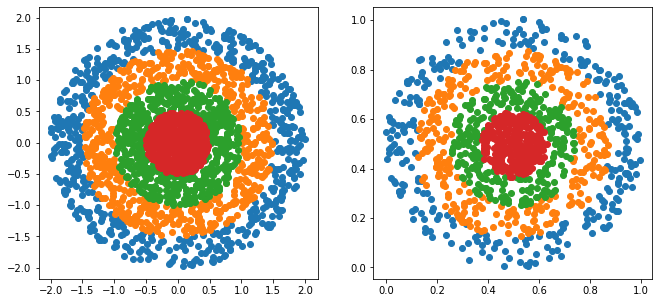

In [25]:
plt.figure(figsize=(11,5))

plt.subplot(1, 2, 1)
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.scatter(x4,y4)

plt.subplot(1, 2, 2)
plt.scatter(x11, y11)
plt.scatter(x22, y22)
plt.scatter(x33, y33)
plt.scatter(x44, y44)